#  <center> 3D Spectogram 
<center>A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time </center>

### <center>How do you read a spectrogram?

Spectrograms are basically two-dimensional graphs, with a third dimension represented by colors.  
<br>horizontal axis (x)= Time. 
<br>vertical axis (y) =frequency
<br>
<br>The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to  stronger (or louder) amplitudes.

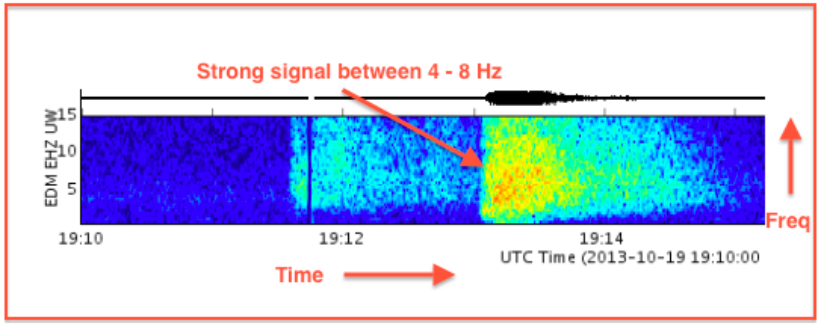

## Let's understand with 3D Spectogram 
Making the amplitute pop out 

In [ ]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd
import wave

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
import cv2

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sample_rate, sample = wavfile.read('../input/birdsong-resampled-train-audio-00/aldfly/XC134874.wav')

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

def plot_raw_wave(samples):
    plt.figure(figsize=(10, 3))
    plt.title('Audio wave')
    plt.ylabel('Amplitude')
    # ax1.plot(np.linspace(0, sample_rate/len(samples1), sample_rate), samples1)
    plt.plot(samples)
    plt.show()


In [ ]:
plot_raw_wave(sample)
ipd.Audio(sample, rate=sample_rate)


In [ ]:
S = librosa.feature.melspectrogram(sample.astype(float), sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram = log_specgram(sample, sample_rate)
data = [go.Surface(z=spectrogram.T)]
layout = go.Layout(
    title='Specgtogram 3d',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## As you can see the yellow color denotes to high amplitute and blue colour denotes low amplitute
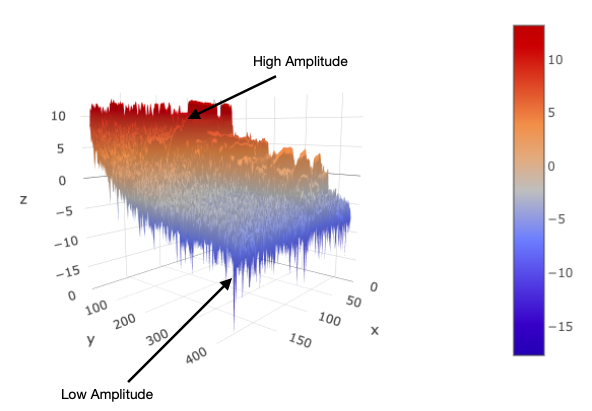

For many people Audio competition is quite different and new type of challenge. But don't give up and keep Learning.
### <br><center>Anyway you always have birds support 
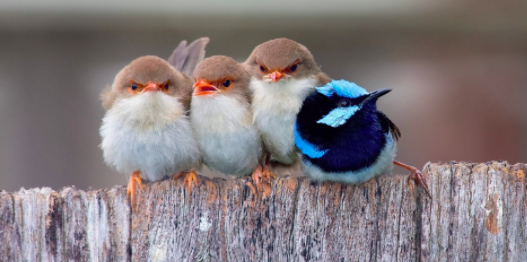